<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/Model_selectionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Data.csv')
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [7]:
# print(x)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)


checking various model accuracy

In [9]:
y_p=[]

In [8]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(x_train,y_train)


LogisticRegression()

In [11]:
y_p1=classifier1.predict(x_test)
y_p.append(y_p1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier()
classifier2.fit(x_train,y_train)


KNeighborsClassifier()

In [13]:
y_p2=classifier2.predict(x_test)
y_p.append(y_p2)

In [14]:
from sklearn.svm import SVC
classifier3=SVC(kernel='rbf')
classifier3.fit(x_train,y_train)

SVC()

In [15]:
y_p3=classifier3.predict(x_test)
y_p.append(y_p3)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier4=GaussianNB()
classifier4.fit(x_train,y_train)

GaussianNB()

In [17]:
y_p4=classifier4.predict(x_test)
y_p.append(y_p4)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier5=RandomForestClassifier()
classifier5.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_p5=classifier5.predict(x_test)
y_p.append(y_p5)

checking accuracy

In [21]:
models=['loagisticRegression','KNN','SVM','NaiveBayes','RandomForest']

In [23]:
from sklearn.metrics import accuracy_score
for i in range(len(models)):
  y_m=y_p[i]
  acc=accuracy_score(y_test,y_m)
  print(f'the accuracy score of {models[i]} model is {acc} \n')


the accuracy score of loagisticRegression model is 0.9562043795620438 

the accuracy score of KNN model is 0.9562043795620438 

the accuracy score of SVM model is 0.9635036496350365 

the accuracy score of NaiveBayes model is 0.9562043795620438 

the accuracy score of RandomForest model is 0.9635036496350365 



plotting confusion matrix for the best model

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set_style('dark')

In [27]:
from sklearn.metrics import confusion_matrix

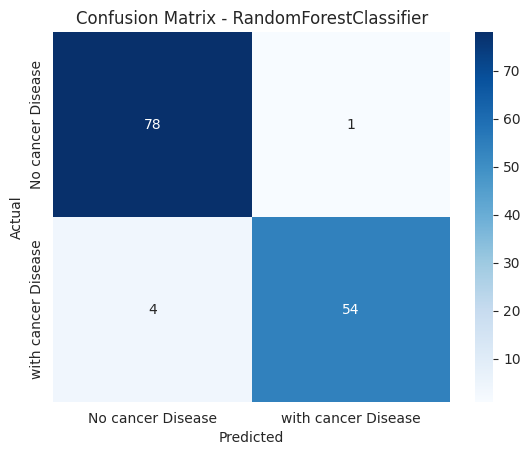

In [31]:
sns.heatmap(confusion_matrix(y_test,y_p5),annot=True, fmt='d', cmap='Blues', xticklabels=['No cancer Disease', 'with cancer Disease'], yticklabels=['No cancer Disease', 'with cancer Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()